# Convolutions as running 'scalar products'
* Given the assumption of locality and stationary, we can reduce the amount of computations of matrix multiplication (input & filter) using a sparse (since data is local) and toeplitz/diagonal constant (since it's stationary)  

In [1]:
# Let's install a library for reading audio...
! pip install librosa

    100% |████████████████████████████████| 1.5MB 920kB/s ta 0:00:01
  Using cached joblib-0.11-py2.py3-none-any.whl
    100% |████████████████████████████████| 327kB 1.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for librosa ... done
  Stored in directory: /Users/aniruddhkhera/Library/Caches/pip/wheels/d0/a6/30/ccafa79ab23bc8310b3a2530f26f9fb5eaac87ba558bc4c11c
  Running setup.py bdist_wheel for audioread ... done
  Stored in directory: /Users/aniruddhkhera/Library/Caches/pip/wheels/47/cc/d8/e1476000d1720a72117ef5c0b1a51388b8567ebfface47ede7
  Running setup.py bdist_wheel for resampy ... done
  Stored in directory: /Users/aniruddhkhera/Library/Caches/pip/wheels/c6/8e/c0/4c402972789ddf6d2d701468417de19d0cad28bd698a867e2d
Successfully built librosa audioread resampy


In [20]:
import librosa
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
x, sampling_rate = librosa.load('win_xp_shutdown.wav')

In [19]:
# Compute the temporal length of x(t)
T = x.size / sampling_rate
print(
    f'x[k] has {x.size} samples',
    f'the sampling rate is {sampling_rate * 1e-3}kHz',
    f'x(t) is {T:.1f}s long'
    , sep='\n')

x[k] has 70641 samples
the sampling rate is 22.05kHz
x(t) is 3.2s long


In [17]:
# Create x(t) time span
dt = 1 / sampling_rate
t = np.r_[0:T:dt] # if slice notation is used, the syntax start:stop:step is equivalent to np.arange(start, stop, step) inside of the brackets. 

### Zoom in, in the following chart, and see how the waveform looks like from very close!

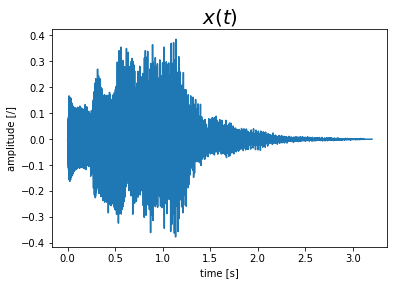

In [21]:
# Visualise x(t)
plt.figure()
plt.plot(t, x)
plt.xlabel('time [s]')
plt.ylabel('amplitude [/]')
plt.title(r'$x(t)$', size=20);

In [22]:
# Import Jupyter utilities for playing audio
from IPython.display import display, Audio

In [25]:
# Let's listen to x(t)
Audio(x, rate=sampling_rate)

In [26]:
# Compute Short-time Fourier transform (STFT) and convert the amplitude to dB
X = librosa.stft(x)
X_dB = librosa.amplitude_to_db(X)

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [27]:
# Import the spectroscope function...
from librosa.display import specshow

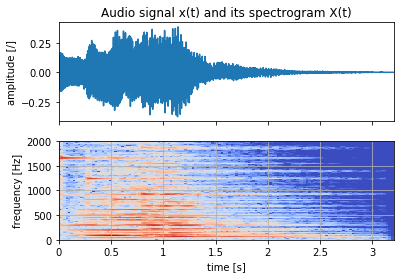

In [42]:
plt.subplot(2,1,1)
plt.plot(t, x)
plt.xlim([0, T])
plt.ylabel('amplitude [/]')
plt.title('Audio signal x(t) and its spectrogram X(t)')
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.subplot(2,1,2)
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
plt.ylim(ymax=2000)
plt.grid(True)

In [35]:
# Manual recontruction of the melody:
# pick the melody frequencies/notes from the spectrogram above
Gs6 = 1661  # Hz
Eb6 = 1244  # Hz
Gs5 = 830   # Hz
Bb5 = 932   # Hz
TT = .4  # s
tt = np.r_[0:TT:dt]

# generate tones
A = {
    'a^(1)': np.sin(2 * np.pi * Gs6 * tt),
    'a^(2)': np.sin(2 * np.pi * Eb6 * tt),
    'a^(3)': np.sin(2 * np.pi * Gs5 * tt),
    'a^(4)': np.sin(2 * np.pi * Bb5 * tt),
}

# and concatenate them
xx = np.concatenate([a[1] for a in A.items()])

In [36]:
# Let's listen to the original and the reconstructed
display(Audio(x, rate=sampling_rate))
display(Audio(xx, rate=sampling_rate))

In [37]:
# Let's compute the STFT of the reconstruction
XX = librosa.stft(xx)
XX_dB = librosa.amplitude_to_db(XX)

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:958: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(magphase(D)[0]) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


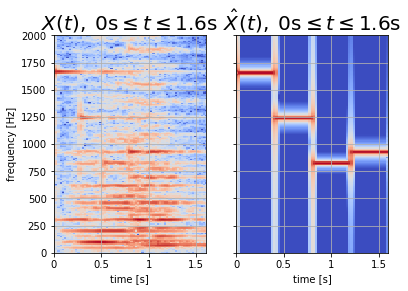

In [41]:
t_string = r'$0\mathrm{s} \leq t \leq 1.6\mathrm{s}$'

plt.subplot(1,2,1)
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.ylim(ymax=2000)
plt.ylabel('frequency [Hz]')
plt.xlabel('time [s]')
plt.grid(True)
plt.xlim(xmax=1.6)
plt.title(r'$X(t),\; $' + t_string, size=20)

plt.subplot(1,2,2)
specshow(XX_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.xlabel('time [s]')
plt.ylim(ymax=2000)
plt.ylabel('')
plt.grid(True)
plt.title(r'$\hat X(t),\; $' + t_string, size=20);

Text(0.5,0,'samples [/]')

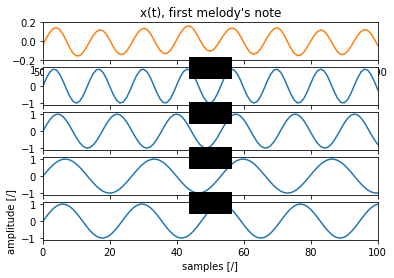

In [43]:
# What about in the time domain? Let's plot x(t) and a^(i)(t)
plt.figure()
plt.subplot(5, 1, 1)
plt.title('x(t), first melody\'s note')
plt.plot(x, 'C1')
plt.xlim([500, 600])
plt.ylim([-.2, .2])
i = 2
for a in A.items():
    plt.subplot(5, 1, i)
    i += 1
    plt.plot(a[1])
    plt.xlim([0, 100])
    plt.title(a[0], verticalalignment='top', backgroundcolor='black')
    if i < 6: 
        plt.setp(plt.gca().get_xticklabels(), visible=False)

plt.ylabel('amplitude [/]')
plt.xlabel('samples [/]')

Text(0.5,0,'time [s]')

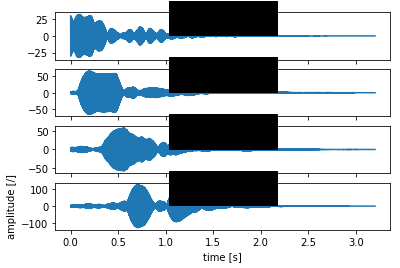

In [44]:
# Finally, let's convolve each tune a^(i) with x(t)
plt.figure()
convs = list()
n = 1
for a in A.items():
    plt.subplot(4, 1, n)
    plt.title(rf'$x(t) \star a^{{({n})}}(t)$', backgroundcolor='black', verticalalignment='top', size=17)
    n += 1
    convs.append(np.convolve(x, a[1], mode='same'))
    plt.plot(t, convs[-1])
    if n < 5: 
        plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.ylabel('amplitude [/]')
plt.xlabel('time [s]')